<a href="https://colab.research.google.com/github/Huuthang1402/Football/blob/main/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 **EXPLORATORY DATA ANALYSIS**

Case study:
You work for a sports analytics company that specializes in providing insights and data-driven solutions for football enthusiasts, teams, and organizations. Your company has been approached by a client who is interested in football development and understanding the historical performance of national football teams . They want to uncover patterns, trends, and insights from historical match results and use this information to make strategic decisions.

**BUSINESS QUESTION**:

1. Best team of all time?

2. Who is the top goal scroer?

3. Which month and which weekdays most matches are played?

4. If the team play at their home, do they have more chance of winning?

5. Is the host nation more likely to receive a penalty in their games during the World Cup, the largest tournament of all time?

6. Teams that played most home/away matches

7. Teams that played least home/away/matches


**THE DATA**
 1. Result dataset : International football results from 1872 to 2023

 2. Goal scorer dataset: Scorers of the goals in international football along with minutes of said goals.

 3. All penalties awarded for all World Cup tournaments

 4. Host nations of World Cup tournaments

In [1]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/Football EDA/results.csv (1).zip')
result = pd.read_csv('/content/drive/MyDrive/Football EDA/results.csv (1).zip')
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [2]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44762 entries, 0 to 44761
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44762 non-null  object
 1   home_team   44762 non-null  object
 2   away_team   44762 non-null  object
 3   home_score  44762 non-null  int64 
 4   away_score  44762 non-null  int64 
 5   tournament  44762 non-null  object
 6   city        44762 non-null  object
 7   country     44762 non-null  object
 8   neutral     44762 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [3]:
result.duplicated().sum()

0

In [4]:
result['date']=pd.to_datetime(result['date'])


In [5]:
result.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
result = result[result['neutral'] == False]


In [7]:
home_team_play = result.groupby('home_team')['home_team'].count()
#Teams that play most home matches
def home_most(x):
  home = max(x)
  team_name_max = x[x==home].index.tolist()
  return team_name_max, home
teams, most_home_matches = home_most(home_team_play)
print("Teams that have played the most home matches:")
for team in teams:
  print(f"'{team}'with {most_home_matches} home matches.")

Teams that have played the most home matches:
'England'with 471 home matches.


In [8]:
home_team_play.sort_values(ascending=False).head(20)

home_team
England          471
Sweden           468
France           449
Hungary          445
Germany          437
United States    430
Austria          412
Switzerland      403
Norway           402
Netherlands      391
Denmark          390
Italy            387
Belgium          386
Scotland         384
Poland           373
Brazil           355
Argentina        344
Wales            327
Spain            323
Finland          321
Name: home_team, dtype: int64

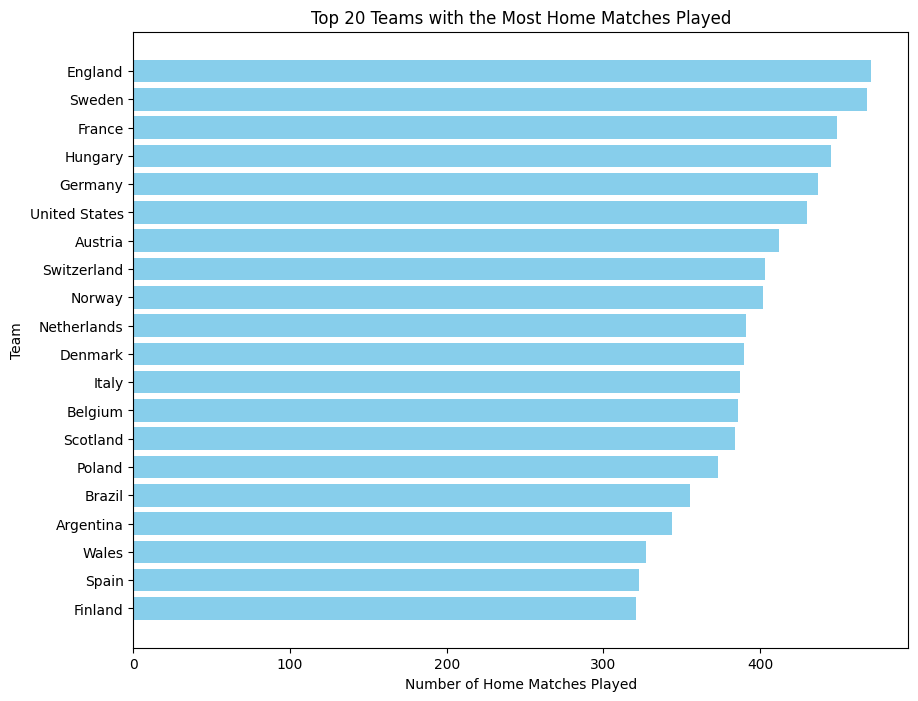

In [9]:
import matplotlib.pyplot as plt

top_20_teams = home_team_play.sort_values(ascending=False).head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_20_teams.index, top_20_teams.values, color='skyblue')
plt.xlabel('Number of Home Matches Played')
plt.ylabel('Team')
plt.title('Top 20 Teams with the Most Home Matches Played')
plt.gca().invert_yaxis()  # Reverse the order to show the team with the most matches at the top
plt.show()


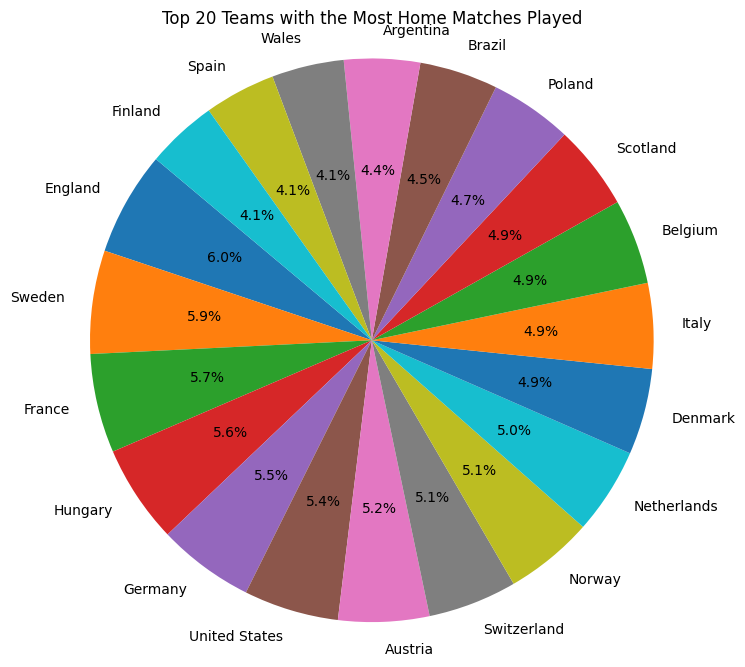

In [10]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_20_teams, labels=top_20_teams.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 20 Teams with the Most Home Matches Played')
plt.show()


In [11]:
#Teams that play least home matches
def home_least(x):
  home = min(x)
  team_name_min = x[x==home].index.tolist()
  return team_name_min, home
teams, least_home_matches = home_least(home_team_play)
print("Teams that have played the least home matches:")
for team in teams:
  print(f"'{team}'with {least_home_matches} home matches.")

Teams that have played the least home matches:
'Bonaire'with 1 home matches.
'Cascadia'with 1 home matches.
'Central Spain'with 1 home matches.
'Madrid'with 1 home matches.
'Micronesia'with 1 home matches.
'Palau'with 1 home matches.
'Ticino'with 1 home matches.


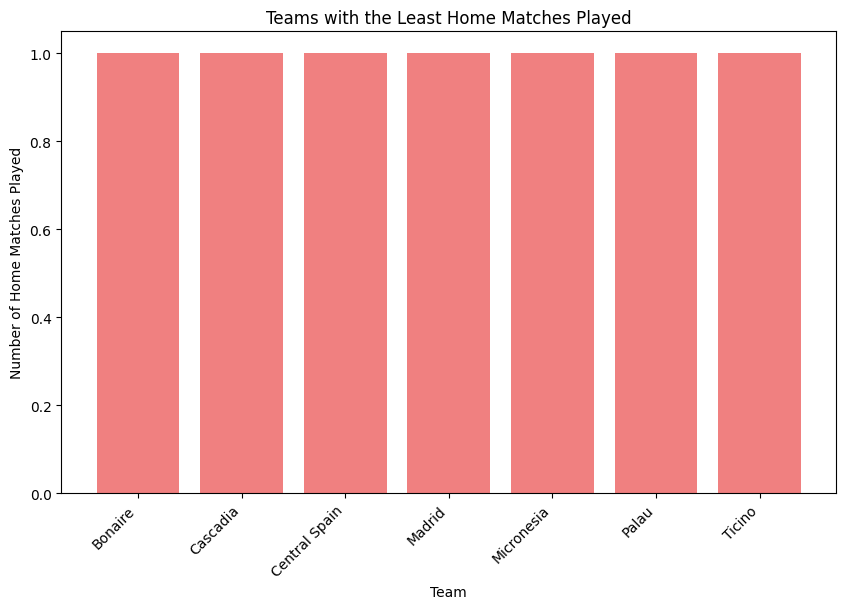

In [12]:

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(teams, least_home_matches, color='lightcoral')
plt.xlabel('Team')
plt.ylabel('Number of Home Matches Played')
plt.title('Teams with the Least Home Matches Played')
plt.xticks(rotation=45, ha='right')  # Rotate team names for better visibility
plt.show()

Some countries on the list above are old country from the past, most has changed their name or no longer exist in 21st century. We want to get the list from 21st century onward...


In [13]:
result_21st_century = result[result['date'].dt.year >= 2000]

In [14]:
#Teams that play least home matches (21st century)
home_team_play_21st_century = result_21st_century.groupby('home_team')['home_team'].count()
def home_least(x):
  home = min(x)
  team_name_min = x[x==home].index.tolist()
  return team_name_min, home
teams1, least_home_matches1 = home_least(home_team_play_21st_century)
print("Teams that have played the least home matches:")
for team in teams1:
  print(f"'{team}'with {least_home_matches1} home matches.")

Teams that have played the least home matches:
'Bonaire'with 1 home matches.
'Cascadia'with 1 home matches.
'Madrid'with 1 home matches.
'Silesia'with 1 home matches.
'Ticino'with 1 home matches.


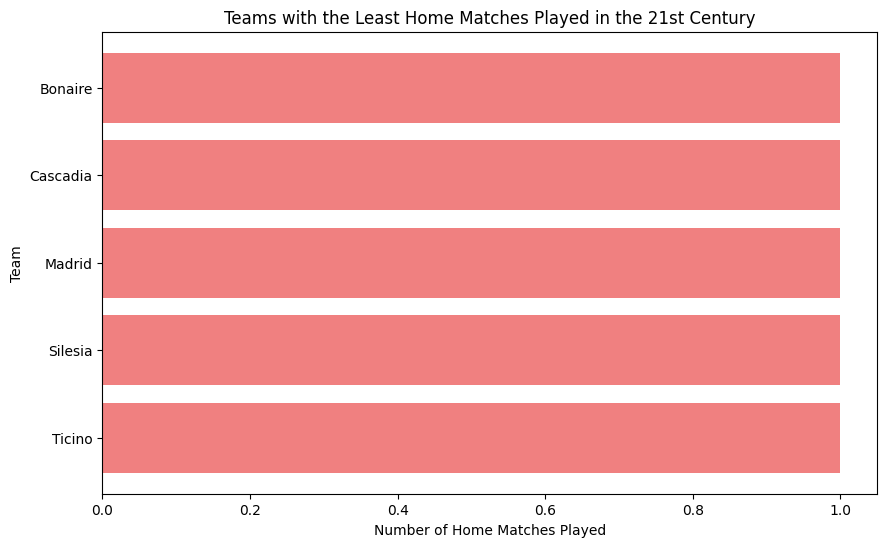

In [15]:

plt.figure(figsize=(10, 6))
plt.barh(teams1, least_home_matches1, color='lightcoral')
plt.xlabel('Number of Home Matches Played')
plt.ylabel('Team')
plt.title('Teams with the Least Home Matches Played in the 21st Century')
plt.gca().invert_yaxis()  # Reverse the order to show the team with the least matches at the top
plt.show()


In [16]:
away_team_play = result.groupby('away_team')['away_team'].count()
#Teams that play most away matches
def away_most(x):
  away = max(x)
  team_name_max = x[x==away].index.tolist()
  return team_name_max, away
teams, most_away_matches = away_most(away_team_play)
print("Teams that have played the most away matches:")
for team in teams:
  print(f"'{team}'with {most_away_matches} away matches.")

Teams that have played the most away matches:
'Sweden'with 477 away matches.


In [17]:
result.groupby('away_team')['away_team'].count().sort_values(ascending=False).head(20)

away_team
Sweden         477
England        469
Hungary        463
Finland        411
Germany        399
Argentina      392
Norway         392
Uruguay        390
Scotland       389
Poland         383
Denmark        376
Switzerland    369
Austria        366
Bulgaria       364
Romania        347
Paraguay       346
Belgium        346
Netherlands    341
Russia         338
Wales          337
Name: away_team, dtype: int64

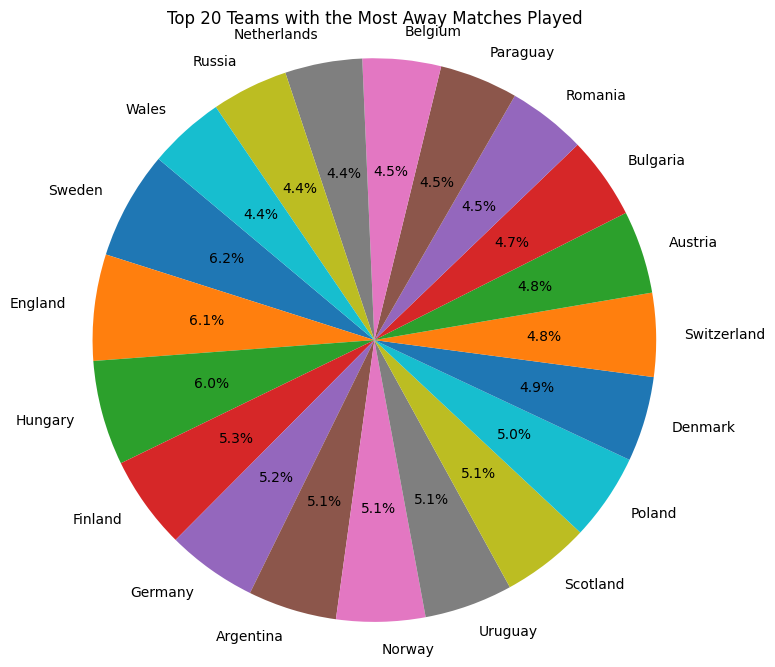

In [18]:

top_20_away_teams = result.groupby('away_team')['away_team'].count().sort_values(ascending=False).head(20)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_20_away_teams, labels=top_20_away_teams.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 20 Teams with the Most Away Matches Played')
plt.show()


* FOOTBALL IS DEVELOPED IN SOUTH AMERICA (BRAZIL, ARGENTINA,PARAGUAY) AND EU (ENGLAND,WALES,SCOTLAND,HUNGARY etc..)
* It seems like EU is the region where football has most developments
* A group of (England,Wales,Scotland) sounds like UK is where football has the most developments in scale of countries

In [19]:
away_team_play = result.groupby('away_team')['away_team'].count()
#Teams that play least away matches
def away_least(x):
  away = min(x)
  team_name_min = x[x==away].index.tolist()
  return team_name_min, away
teams, least_away_matches = away_least(away_team_play)
print("Teams that have played the least away matches:")
for team in teams:
  print(f"'{team}'with {least_away_matches} away matches.")

Teams that have played the least away matches:
'Andalusia'with 1 away matches.
'Arameans Suryoye'with 1 away matches.
'Asturias'with 1 away matches.
'Barawa'with 1 away matches.
'Cascadia'with 1 away matches.
'Central Spain'with 1 away matches.
'Corsica'with 1 away matches.
'County of Nice'with 1 away matches.
'Felvidék'with 1 away matches.
'Hitra'with 1 away matches.
'Kárpátalja'with 1 away matches.
'Manchukuo'with 1 away matches.
'Menorca'with 1 away matches.
'Parishes of Jersey'with 1 away matches.
'Raetia'with 1 away matches.
'Rhodes'with 1 away matches.
'Romani people'with 1 away matches.
'Saare County'with 1 away matches.
'Saint Helena'with 1 away matches.
'Somaliland'with 1 away matches.
'South Ossetia'with 1 away matches.
'Surrey'with 1 away matches.
'Two Sicilies'with 1 away matches.
'Vatican City'with 1 away matches.
'Western Sahara'with 1 away matches.


In [55]:
def game_result(result):
    if result.home_score > result.away_score:
        return 'win'
    if result.away_score > result.home_score:
        return 'lost'
    else:
        return 'tie'

result['match_result'] = result.apply(game_result,axis=1)
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,weekday,match_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,Saturday,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873,Saturday,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,Saturday,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875,Saturday,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday,win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,3,1877,Saturday,lost
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,3,1877,Monday,lost
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,3,1878,Saturday,win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,3,1878,Saturday,win


In [21]:
def determine_home_team_outcome(row):
    if row['match_result'] == 'win':
        return 1
    else:
        return 0

result['Homewin'] = result.apply(determine_home_team_outcome, axis=1)
result.head(10)




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_result,Homewin
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,1
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win,1
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lost,0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,lost,0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win,1
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,win,1


In [22]:
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_result,Homewin
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,1
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win,1
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lost,0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,lost,0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win,1
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,win,1


In [23]:
result.info(10)
result.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33594 entries, 0 to 44760
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          33594 non-null  datetime64[ns]
 1   home_team     33594 non-null  object        
 2   away_team     33594 non-null  object        
 3   home_score    33594 non-null  int64         
 4   away_score    33594 non-null  int64         
 5   tournament    33594 non-null  object        
 6   city          33594 non-null  object        
 7   country       33594 non-null  object        
 8   neutral       33594 non-null  bool          
 9   match_result  33594 non-null  object        
 10  Homewin       33594 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 2.9+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_result,Homewin
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,1
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win,1
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lost,0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,lost,0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win,1
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,win,1


In [24]:
result.describe()

,home_score,away_score,Homewin
count,33594.000000,33594.000000,33594.000000
mean,1.775734,1.111657,0.505745
std,1.722169,1.284056,0.499974
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,3.000000,2.000000,1.000000
max,31.000000,15.000000,1.000000


In [25]:
result['match_result'].value_counts()

win     16990
lost     8853
tie      7751
Name: match_result, dtype: int64

<Axes: >

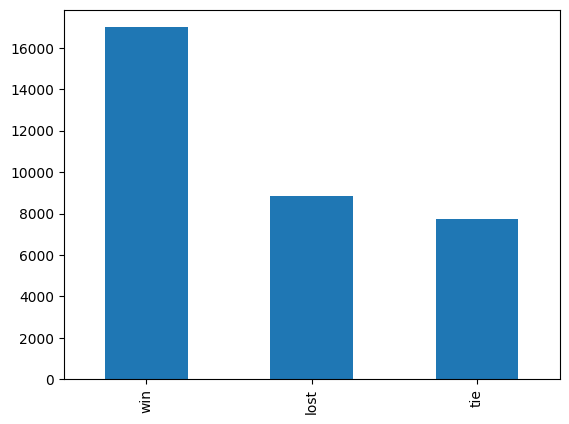

In [26]:
import matplotlib.pyplot as plt
result['match_result'].value_counts().plot.bar()

In [27]:
#best team of all time
#using logic of unbeatable team = the best team  -> we will find team with least home matches lost and least away matches lost
result = pd.read_csv('/content/drive/MyDrive/Football EDA/results.csv (1).zip')
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [28]:
home_team_lost=result[result['home_score']<result['away_score']]
total_home_play = result.groupby('home_team')['home_team'].count()

In [29]:
home_matches_lost=home_team_lost.groupby('home_team')['home_team'].count()

In [30]:
home_lost_rate = home_matches_lost / total_home_play
home_lost_rate.sort_values(ascending = True).head(5)


home_team
Jersey             0.062500
Andalusia          0.083333
Northern Cyprus    0.090909
Brazil             0.098827
Padania            0.107143
Name: home_team, dtype: float64

In [31]:
away_team_lost=result[result['home_score']>result['away_score']]
total_away_play = result.groupby('away_team')['away_team'].count()
away_matches_lost=away_team_lost.groupby('away_team')['away_team'].count()
away_lost_rate = away_matches_lost / total_away_play
away_lost_rate.sort_values(ascending = True).head(10)

# ?

away_team
Basque Country    0.160000
Abkhazia          0.200000
Kárpátalja        0.200000
County of Nice    0.200000
Padania           0.200000
Menorca           0.200000
England           0.222433
Spain             0.238764
Brazil            0.242424
Iran              0.248927
Name: away_team, dtype: float64

In [32]:
total_matches_play=total_home_play + total_away_play

In [33]:
losing_rate_of_all_time = (away_matches_lost + home_matches_lost)/total_matches_play

In [34]:
top_team = losing_rate_of_all_time.sort_values(ascending = True).head(20)

<Axes: >

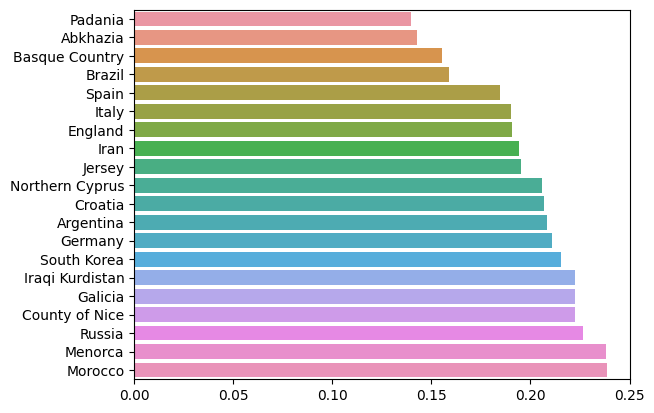

In [37]:
import seaborn as sns
sns.barplot(x=top_team, y=top_team.index)


In [ ]:
# top 5 best team that still current exist : Brazil, Spain, Italy, England, Iran

In [ ]:
# which months and weekday most matches are played?

In [40]:
#re-read the result data to have all matches played
result = pd.read_csv('/content/drive/MyDrive/Football EDA/results.csv (1).zip')
result['date']=pd.to_datetime(result['date'])
result['month']=result['date'].dt.month
result['year']=result['date'].dt.year
result['date'].dt.dayofweek
result['weekday']=result['date'].dt.day_name()
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,weekday
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,3,1877,Saturday
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,3,1877,Monday
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,3,1878,Saturday
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,3,1878,Saturday


In [41]:
result.groupby('weekday')['weekday'].count()

weekday
Friday        4329
Monday        2714
Saturday      7621
Sunday       10708
Thursday      3913
Tuesday       5146
Wednesday    10331
Name: weekday, dtype: int64

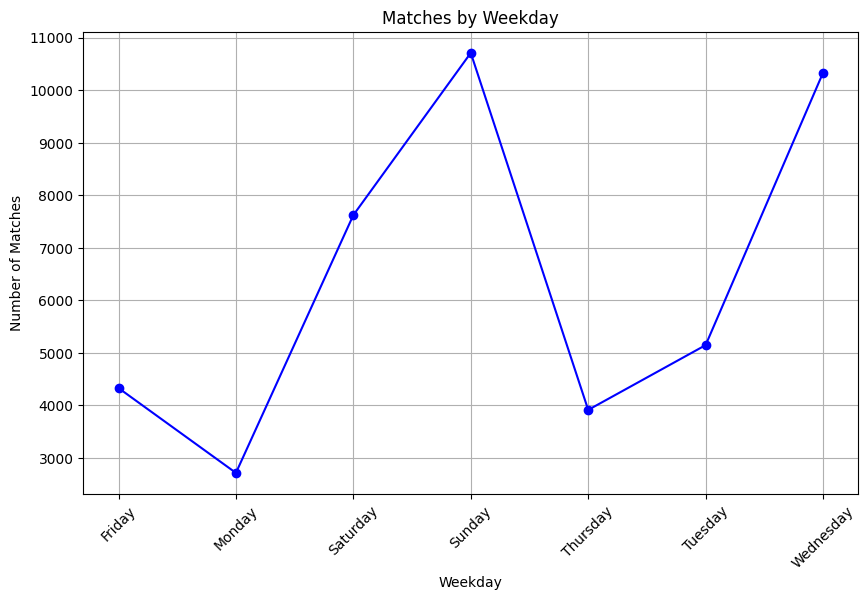

In [42]:
import matplotlib.pyplot as plt
weekday_counts = result.groupby('weekday')['weekday'].count()

# Plot a line chart
weekday_counts.plot(kind='line', marker='o', color='b', figsize=(10, 6))
plt.title('Matches by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [43]:
result.groupby('month')['month'].count()

month
1     2350
2     2593
3     4636
4     2596
5     3287
6     6744
7     2913
8     2851
9     4709
10    4991
11    4736
12    2356
Name: month, dtype: int64

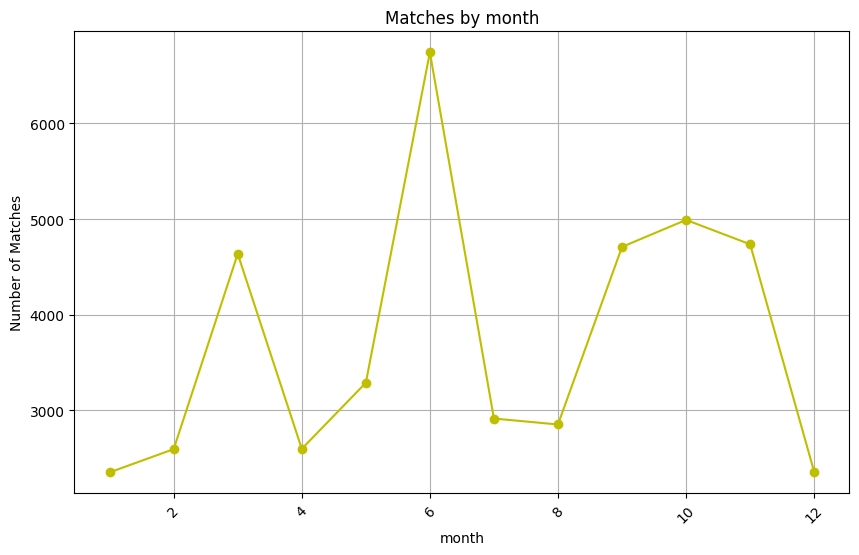

In [44]:
month_counts = result.groupby('month')['month'].count()
month_counts.plot(kind='line', marker='o', color='y', figsize=(10, 6))
plt.title('Matches by month')
plt.xlabel('month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
#Explore the type of tournament
tour = result['tournament'].value_counts().sort_values(ascending = False).head(10)

<Axes: xlabel='tournament'>

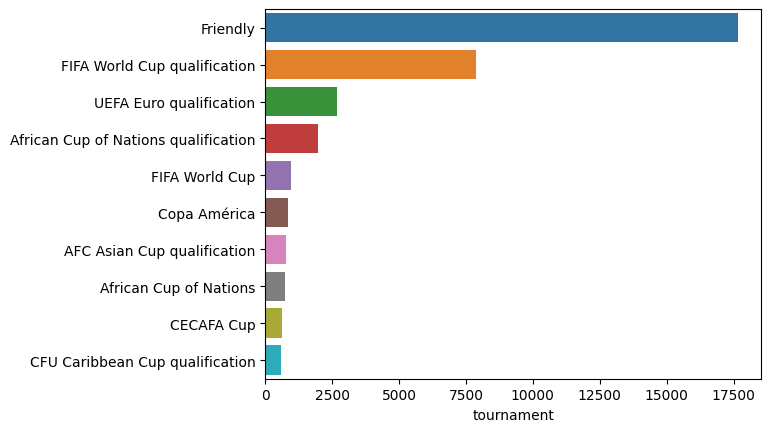

In [54]:
sns.barplot(y=tour.index, x=tour)

Most of the matches held were of Friendly nature followed by FIFA World Cup qualification matches. Then comes UEFA Euro qualification matches with the total count of 2593. FIFA World Cup matches stand on fifth position with the count of 900.

In [56]:
#let's dive into the most exciting football tournament of the world: FIFA WORLD CUP
#now we are going to find out who were the host of all ffwc tournament and which home_team has won most matches?
result.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,weekday,match_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,Saturday,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873,Saturday,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,Saturday,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875,Saturday,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,3,1876,Saturday,win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,3,1877,Saturday,lost
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,3,1877,Monday,lost
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,3,1878,Saturday,win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,3,1878,Saturday,win


In [57]:
FIFA_matches = result[result.tournament=='FIFA World Cup']

In [58]:
FIFA_host_win_matches = FIFA_matches[FIFA_matches.match_result=='win']

In [63]:
FIFA_host_win_matches1 = FIFA_matches[FIFA_matches.neutral=='False']

In [68]:
FFWC = FIFA_host_win_matches.groupby('home_team').match_result.count().sort_values(ascending = False).head(15).reset_index()

In [70]:
FFWC.head(10)

,home_team,match_result
0,Brazil,58
1,Germany,49
2,Argentina,42
3,France,28
4,Italy,27
5,England,20
6,Belgium,15
7,Netherlands,15
8,Sweden,13
9,Spain,13


<function matplotlib.pyplot.show(close=None, block=None)>

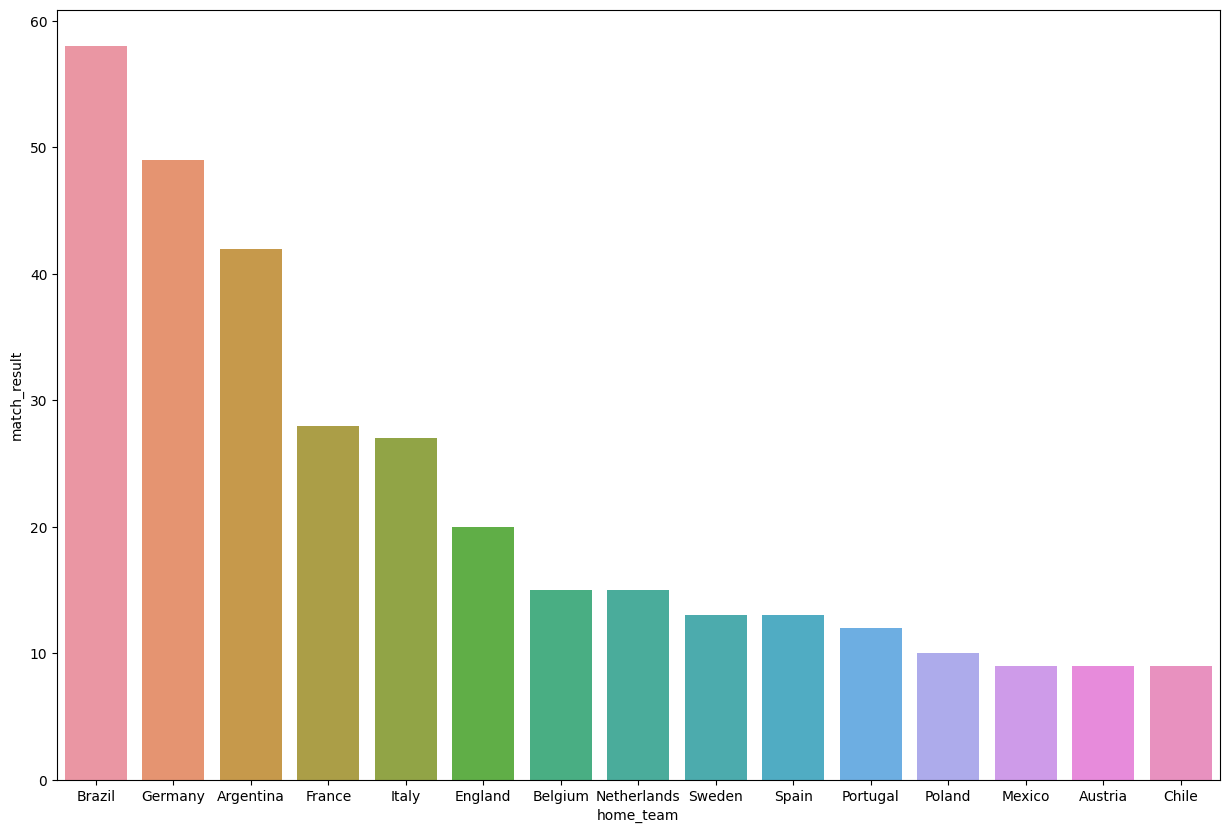

In [91]:
plt.figure(figsize=(15, 10))
sns.barplot(x=FFWC['home_team'], y=FFWC['match_result'])
plt.show

In [97]:
win_tie_rate_bytop5 = result[(result.home_team=='Brazil')|(result.home_team=='England')|(result.home_team=='Italy')|(result.home_team=='Spain')|(result.home_team=='Iran')]

<Axes: xlabel='home_team', ylabel='count'>

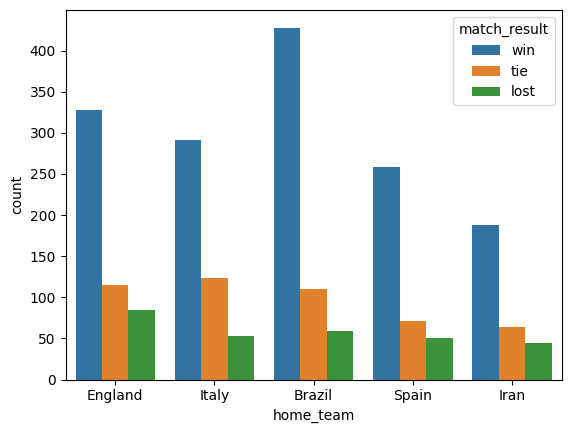

In [100]:
sns.countplot(data=win_tie_rate_bytop5, x='home_team',hue='match_result')